In [1]:
import numpy as np
from numpy import pi,sin,cos, arccos as acos, arcsin as asin
from matplotlib import pyplot as plt , cm as cmap 
au=149_597_870_700 # [m] (by definition) astronomical unit: distance sun<->earth
r_sun=695_700_000 # [m] radius of the sun
T_sun=5_772.0 # [K] surface temperature of the sun
r_earth=6_378_100 # [m] radius of the earth at equator
g_earth=9.80665 # [m/s^2] acceleration due to gravity on earth
cp_air=1005 # [J/(kg K)] specific heat capacity at constant pressure for dry air @15°C
deg=pi/180 # 1 angle degree in radians (conversion factor)
atm=101325 # [Pa] atmospheric pressure
day=24*3600 # [s] length if day in seconds
σ_SB=5.67037442e-8 # [J/(m^2 K^4)] Stefan-Boltzmann constant
print(f'{r_sun=:7.3e}m, {T_sun=}K, {au=:7.3e}m')

r_sun=6.957e+08m, T_sun=5772.0K, au=1.496e+11m


$$\dot q_{\rm au}=\sigma_\text{S-B}\cdot T_{\rm sun}^4\cdot\left(\frac{r_{\rm sun}}{1\cdot{\rm au}}\right)^2$$

In [2]:
q_au=σ_SB*T_sun**4*(r_sun/(1*au))**2
print(f'{q_au=:0.0f}W/m^2') 

q_au=1361W/m^2


In [3]:
cp_atmosphere=cp_air*1*atm/g_earth
print(f'{cp_atmosphere=:0.3e}J/(m^2 K)')

cp_atmosphere=1.038e+07J/(m^2 K)


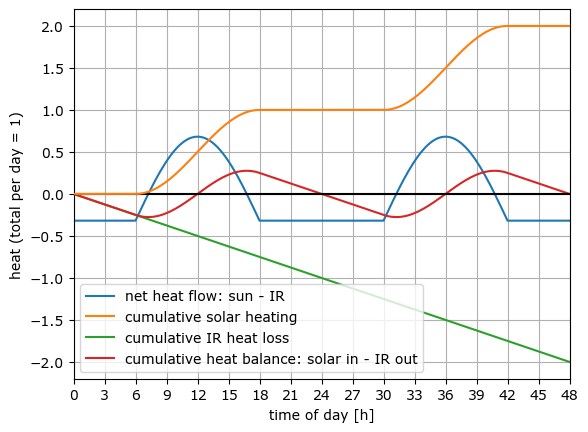

In [4]:
def Qsun(t):
  i,r=np.divmod(t+6,24)
  return i + (r>12)* 0.5*(1+cos(r*(pi/12)))
tod=np.linspace(0,48,201)
solrad=np.maximum(cos((tod-12)/24*2*pi),0)
plt.plot(tod,solrad-1/pi,label="net heat flow: sun - IR")
plt.plot(tod,Qsun(tod),zorder=20,label="cumulative solar heating")
plt.plot((0,48),(0,-2),label="cumulative IR heat loss")
plt.plot(tod,Qsun(tod)-tod/24,label="cumulative heat balance: solar in - IR out")
plt.plot((0,48),(0,0),'k',zorder=10)
plt.grid()
plt.xlim((0,48))
plt.xticks(range(0,49,3))
plt.xlabel("time of day [h]")
plt.ylabel("heat (total per day = 1)")
plt.legend()
plt.show()

In [5]:
def dT_dt(phi):
    return q_au*cos(phi)/(cp_atmosphere*pi)
af=sin(acos(1/pi))-acos(1/pi)*1/pi
print(f'{af=}')

for phi in (0,30,40,50,60,70):
  print(f'{phi=:2.0f}: {dT_dt(phi*deg)*day = :0.2f}K/day (ΔT={dT_dt(phi*deg)*day*af:0.2f}K with simultaneous cooling)')

af=0.5511019658223668
phi= 0: dT_dt(phi*deg)*day = 3.61K/day (ΔT=1.99K with simultaneous cooling)
phi=30: dT_dt(phi*deg)*day = 3.12K/day (ΔT=1.72K with simultaneous cooling)
phi=40: dT_dt(phi*deg)*day = 2.76K/day (ΔT=1.52K with simultaneous cooling)
phi=50: dT_dt(phi*deg)*day = 2.32K/day (ΔT=1.28K with simultaneous cooling)
phi=60: dT_dt(phi*deg)*day = 1.80K/day (ΔT=0.99K with simultaneous cooling)
phi=70: dT_dt(phi*deg)*day = 1.23K/day (ΔT=0.68K with simultaneous cooling)


$$T_{\rm BB} = T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{2.5pt}]{\frac{r_{\rm sun}^2}{{(1 \cdot \rm{au})}^2}\cdot\frac{\pi\cdot r_{\rm earth}^2}{4\cdot\pi\cdot r_{\rm earth}^2}}=T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{2.5pt}]{\frac{r_{\rm sun}^2}{{(1 \cdot \rm{au})}^2}\cdot\frac{1}{4}}$$

$$T_{\rm GB} = T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{2.5pt}]{\frac{r_{\rm sun}^2}{{(1 \cdot \rm{au})}^2}\cdot\frac{(1-\alpha_{\rm cloud})\cdot\pi\cdot r_{\rm earth}^2}{(1-\alpha_{\rm cloud})\cdot4\cdot\pi\cdot r_{\rm earth}^2}}=T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{2.5pt}]{\frac{r_{\rm sun}^2}{{(1 \cdot \rm{au})}^2}\cdot\frac{1}{4}}$$

In [6]:
T_BB = T_GB =T_sun * (r_sun**2/(1*au)**2 * (1/4))**(1/4)
print(f'T_BB = T_GB = {T_BB:0.2f}K = {T_BB-273.15:0.2f}°C')

T_BB = T_GB = 278.33K = 5.18°C


$$T_{\rm rot}(\phi) = T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{3pt}]{\frac{r_\rm{sun}^2}{{(1 \cdot \rm{au})}^2}\cdot\frac{{\rm cos}(\phi)}{\pi}}$$

In [7]:
def T_rot(phi):
    return T_sun * (r_sun**2/(1*au)**2 * (cos(phi)/pi))**(1/4)

In [8]:
lat=np.linspace(-90,90,101)
def Temperature_map(ax,T_phi):
  ax.set_aspect('equal')
  ax.set_facecolor('lightgray')
  for lon in range(-180,181,30):
    ax.plot(lon*cos(lat*deg),lat,'k',zorder=10)
  for lat30 in range(-90,91,30):
    ax.plot(np.array([-180,180])*cos(lat30*deg),(lat30,lat30), \
           'k' if lat30!=0 else 'r' ,zorder=10)
  for lat2 in range(-88,89,2):
    ax.plot(np.array([180,-180])*cos(lat2*deg)+(-2,2),(lat2,lat2), \
           color=cmap.jet((T_phi(lat2/180*pi)-220)/150),lw=2.5,zorder=5)
  ax.set_title(f'Equal-Area Temperature Map for "{T_phi.__name__}"')
  ax.set_xlabel("Longitude")
  ax.set_ylabel("Latitude")
  ax.set_xticks(range(-180,181,30))
  ax.set_yticks(range(-90,91,30))



In [9]:
for phi in reversed([0,10,20,30,40,50,60]): 
 print(f'T_rot({phi:2.0f}°Lat) = {T_rot(phi*deg):0.2f}K, ={T_rot(phi*deg)-273.15:7.2f}°C')

T_rot(60°Lat) = 248.62K, = -24.53°C
T_rot(50°Lat) = 264.73K, =  -8.42°C
T_rot(40°Lat) = 276.60K, =   3.45°C
T_rot(30°Lat) = 285.21K, =  12.06°C
T_rot(20°Lat) = 291.09K, =  17.94°C
T_rot(10°Lat) = 294.53K, =  21.38°C
T_rot( 0°Lat) = 295.66K, =  22.51°C


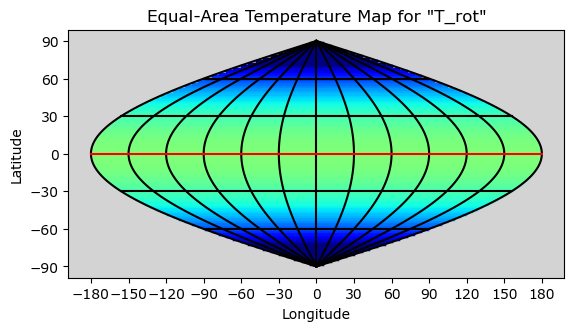

In [10]:
plt.close()
fig,ax=plt.subplots(1,1)
Temperature_map(ax,T_rot)
plt.show()

$$\overline{T_{\rm rot}}=T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{3pt}]{\frac{r_\rm{sun}^2}{{(1 \cdot \rm{au})}^2}}\cdot\frac{\int_{-\frac \pi 2}^\frac \pi 2 \frac{\cos(\phi)^\frac 1 4}{\pi} \cdot \cos(\phi) \enspace {\rm d} \phi}{\int_{-\frac\pi 2}^\frac{\pi}{2} \cos(\phi)\enspace{\rm d}\phi}=T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{3pt}]{\frac{r_\rm{sun}^2}{{(1 \cdot \rm{au})}^2}}\cdot{-\frac{4\cdot\sqrt[\Large 4 \hspace{2pt}]\pi\cdot\Gamma(\frac 1 8)}{15\cdot\Gamma({-\frac 3 8})}}$$ 

In [11]:
from math import gamma
T_rot_avg=T_sun * (r_sun**2/(1*au)**2)**(1/4)*-4/15*pi**(1/4)*gamma(1/8)/gamma(-3/8)
print(f'T_rot_avg = {T_rot_avg:0.2f}K = {T_rot_avg-273.15:0.2f}°C')

T_rot_avg = 275.22K = 2.07°C


$$T_{\rm pol}(\phi) = T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{3pt}]{\frac{r_\rm{sun}^2}{{(1 \cdot \rm{au})}^2}\cdot\frac{\sin(\phi)}{1}}$$

In [12]:
def T_pol(phi):
    return 0 if phi<0 else T_sun * (r_sun**2/(1*au)**2 * (sin(phi)/1))**(1/4)
for phi in [90,80,70,60,50,40,30,20,10,0,-10]: 
 print(f'T_rot({phi:3.0f}°Lat) ={T_pol(phi*deg):7.2f}K ={T_pol(phi*deg)-273.15:7.2f}°C')

T_rot( 90°Lat) = 393.62K = 120.47°C
T_rot( 80°Lat) = 392.11K = 118.96°C
T_rot( 70°Lat) = 387.54K = 114.39°C
T_rot( 60°Lat) = 379.71K = 106.56°C
T_rot( 50°Lat) = 368.25K =  95.10°C
T_rot( 40°Lat) = 352.45K =  79.30°C
T_rot( 30°Lat) = 330.99K =  57.84°C
T_rot( 20°Lat) = 301.01K =  27.86°C
T_rot( 10°Lat) = 254.09K = -19.06°C
T_rot(  0°Lat) =   0.00K =-273.15°C
T_rot(-10°Lat) =   0.00K =-273.15°C


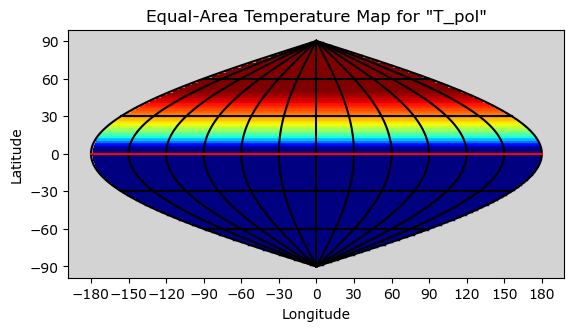

In [13]:
plt.close()
fig,ax=plt.subplots(1,1)
Temperature_map(ax,T_pol)
plt.show()

$$\overline{T_{\rm pol}}=T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{3pt}]{\frac{r_\rm{sun}^2}{{(1 \cdot \rm{au})}^2}}\cdot\frac{\int_0^\frac \pi 2 \frac{\sin(\phi)^\frac 1 4}{1} \cdot \cos(\phi) \enspace {\rm d} \phi}{\int_{-\frac\pi 2}^\frac{\pi}{2} \cos(\phi)\enspace{\rm d}\phi}=T_{\rm sun}\cdot\sqrt[\Large 4 \hspace{3pt}]{\frac{r_\rm{sun}^2}{{(1 \cdot \rm{au})}^2}}\cdot\frac 2 5$$ 

In [14]:
from math import gamma
T_pol_avg=T_sun * (r_sun**2/(1*au)**2)**(1/4)*2/5
print(f'T_pol_avg = {T_pol_avg:0.2f}K = {T_pol_avg-273.15:0.2f}°C')

T_pol_avg = 157.45K = -115.70°C


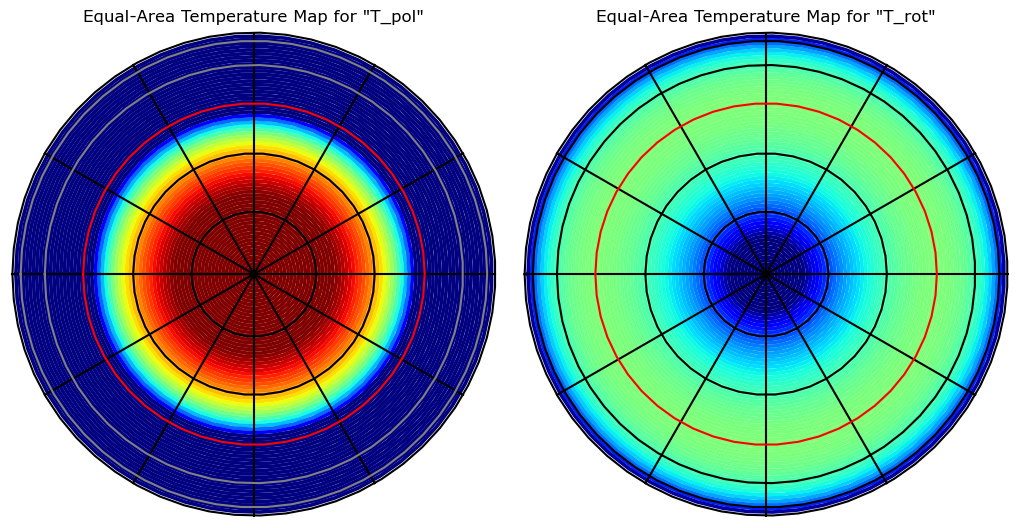

In [15]:
def circle(r,tol=0.5):
  n=max(5,int(pi/(2*tol/r)**0.5)+1)
  phi=np.linspace(-pi,pi,n+1)
  return (r*cos(phi),r*sin(phi))

def flat_earth(ax,T_phi):
  ax.set_aspect('equal')
  ax.set_axis_off()
  R=140
  ax.set_xlim(-R*1.01,R*1.01)
  ax.set_ylim(-R*1.01,R*1.01)
  for lon in range(0,180,30):
    ax.plot((-R*cos(lon*deg),R*cos(lon*deg)),(-R*sin(lon*deg),R*sin(lon*deg)), \
           'k',zorder=10)
  for lat30 in range(-90,89,30):
    ax.plot(*circle(R/2*(2-2*sin(lat30*deg))**0.5,tol=0.2), \
         'r' if lat30==0 else  'k' if T_phi(lat30*deg)>100 or lat30== -90  else 'gray' ,zorder=10)
  for r in range(2,R,2):
    phi=asin(1-(r/(R/2**0.5))**2)
    ax.plot(*circle(r,tol=0.2), \
         color=cmap.jet((T_phi(phi)-220)/150),lw=2.6,zorder=5)
  ax.set_title(f'Equal-Area Temperature Map for "{T_phi.__name__}"')
plt.close()
fig,axes=plt.subplots(1,2,figsize=(10.0,9.0),\
        gridspec_kw=dict(wspace=0.05,left=0,right=1,top=0.7))
flat_earth(axes[0],T_pol)
flat_earth(axes[1],T_rot)
plt.show()

 ![Earth: Cloud cover](./IMG_0097.AVIF)

 ![Chimborazo](./IMG_0099.WEBP)